In [66]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [67]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
FILE_PATH="D:\\NLP\\NLP_ML_Projects\\Dataset\\UpdatedResumeDataSet.csv"
df=pd.read_csv(FILE_PATH)

In [69]:
df["Category"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object>

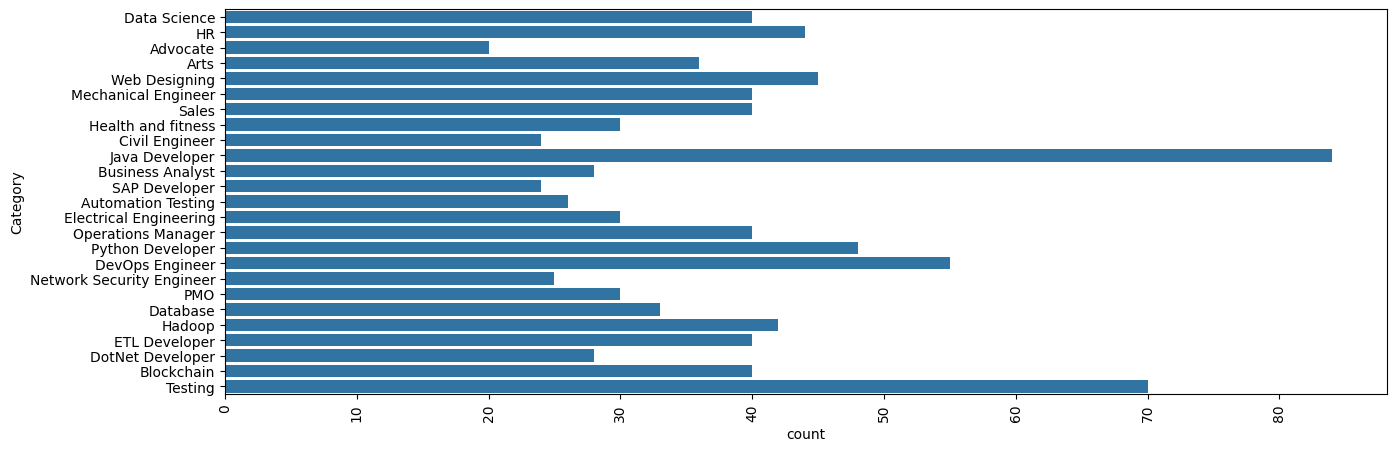

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.xticks(rotation=90)
plt.show()

In [71]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    # Join the words back into a string
    preprocessed_text = ' '.join(lemmatized_words)
    
    return preprocessed_text

# Apply text preprocessing to the 'resume' column
df['clean_resume'] = df['Resume'].apply(preprocess_text)



In [72]:
from sklearn.model_selection import train_test_split, learning_curve

X_train, X_test, y_train, y_test = train_test_split(df['clean_resume'], df['Category'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression classifier
classifier = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Train the classifier using cross-validation
cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# Fit the classifier on the entire training data
classifier.fit(X_train_tfidf, y_train)

# Evaluate the model on training data
train_accuracy = classifier.score(X_train_tfidf, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on test data
test_accuracy = classifier.score(X_test_tfidf, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate classification report on test data
y_pred = classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.98701299 0.98051948 0.98701299 0.98701299 1.        ]
Mean CV Accuracy: 0.99
Training Accuracy: 1.00
Test Accuracy: 0.99
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineeri

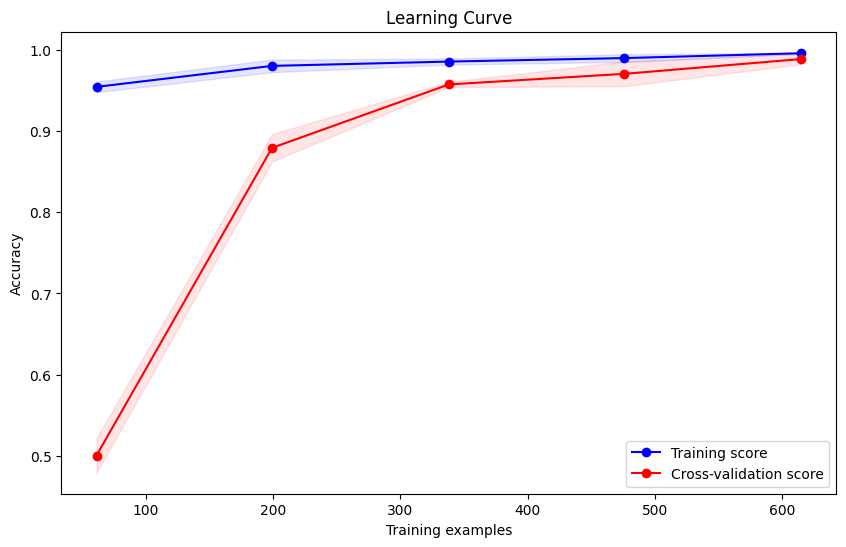

In [74]:
# Plot learning curve to visualize model performance
train_sizes, train_scores, test_scores = learning_curve(classifier, X_train_tfidf, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()